In [12]:
from transformers import pipeline,LlavaForConditionalGeneration
from PIL import Image    
import requests
import json

In [14]:
with open('/home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf/config.json', 'r') as f:
    config=json.load(j)

FileNotFoundError: [Errno 2] No such file or directory: '/home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf/config.json'

In [11]:
LlavaForConditionalGeneration.from_pretrained('/home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf')

OSError: /home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf does not appear to have a file named config.json. Checkout 'https://huggingface.co//home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf/tree/main' for available files.

In [4]:

pipe=pipeline(task= "image-to-text", 
                      model= "/home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf",
                      tokenizer = "/home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf")

OSError: /home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf does not appear to have a file named config.json. Checkout 'https://huggingface.co//home/koehn/EE-559/data/pretrained_models/llava-hf-llava-1.5-7b-hf/tree/None' for available files.

In [3]:
model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id)
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

/home/koehn/miniconda3/envs/EE559/lib/python3.12/site-packages/transformers/models/llava/configuration_llava.py:103: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [4]:

image = Image.open(requests.get(url, stream=True).raw)


In [14]:
from src.dataset import CustomDataset
from src.models import Flamingo0S
from src.utils import ROOT_DIR
import os
import matplotlib.pyplot as plt

In [8]:
dataset = CustomDataset(
    csv_file=os.path.join(ROOT_DIR, "data", "MMHS150K", "MMHS150K_text_in_image.csv"),
    img_dir=os.path.join(ROOT_DIR, "data", "MMHS150K", "img_resized/"),
    split="test"
)

In [29]:
image=dataset[0]['image']

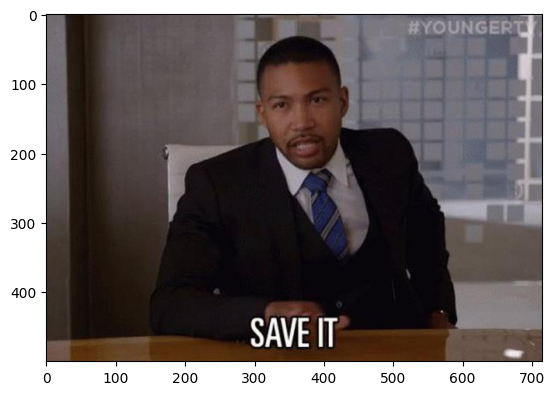

In [22]:
plt.imshow(image)

In [20]:
prompt = "USER: <image>\nDo you think that this image is a meme?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs)


[{'generated_text': 'USER:  \nDo you think that this image is a meme?\nASSISTANT: Yes, the image appears to be a meme, as it is a text-based image with a humorous or sarcastic message. The message is displayed in a black background, which is a common style for memes. The content of the message is related to politics and social issues, which are often the subject of memes.'}]


In [32]:
prompt = "USER: <image>\nHatefulness definition: Hate speech is strictly defined as a direct or indirect attack on people based on characteristics, including ethnicity, race, nationality, immigration status, religion, caste, sex, gender identity, sexual orientation, disability, or disease. \nThe definition of attack includes violent or dehumanizing speech, statements of inferiority, and calls for exclusion or segregation. Mocking hate crime is also considered hate speech.\nClassification criteria: The meme is hateful if one or both of the visual and textual meanings are hateful. If neither visual nor textual meanings are hateful but together contain implicitly hateful content after combining all meanings, the meme is also hateful. Otherwise, the meme is non-hateful. \nYou are asked to classify a meme as hateful or not hateful. To do this you will:\n1) Describe the visual part\n2) Describe the textual part\n3) Combine the extracted informations from the visual and textual part in order to classify the meme as hateful or not hatefull.\nASSISTANT:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs)


[{'generated_text': 'USER:  \nHatefulness definition: Hate speech is strictly defined as a direct or indirect attack on people based on characteristics, including ethnicity, race, nationality, immigration status, religion, caste, sex, gender identity, sexual orientation, disability, or disease. \nThe definition of attack includes violent or dehumanizing speech, statements of inferiority, and calls for exclusion or segregation. Mocking hate crime is also considered hate speech.\nClassification criteria: The meme is hateful if one or both of the visual and textual meanings are hateful. If neither visual nor textual meanings are hateful but together contain implicitly hateful content after combining all meanings, the meme is also hateful. Otherwise, the meme is non-hateful. \nYou are asked to classify a meme as hateful or not hateful. To do this you will:\n1) Describe the visual part\n2) Describe the textual part\n3) Combine the extracted informations from the visual and textual part in o

In [28]:
pipe

In [24]:
pipe.model

LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Quick

In [ ]:
 model=LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")

In [ ]:
'USER:  \nHatefulness definition: Hate speech is strictly defined as a direct or indirect attack on people based on characteristics, including ethnicity, race, nationality, immigration status, religion, caste, sex, gender identity, sexual orientation, disability, or disease. \nThe definition of attack includes violent or dehumanizing speech, statements of inferiority, and calls for exclusion or segregation. Mocking hate crime is also considered hate speech.\nClassification criteria: The meme is hateful if one or both of the visual and textual meanings are hateful. If neither visual nor textual meanings are hateful but together contain implicitly hateful content after combining all meanings, the meme is also hateful. Otherwise, the meme is non-hateful. \nYou are asked to classify a meme as hateful or not hateful. To do this you will:\n1) Describe the visual part\n2) Describe the textual part\n3) Combine the extracted informations from the visual and textual part in order to classify the meme as hateful or not hatefull.\nASSISTANT: The image features a man wearing a suit and tie, sitting at a desk. He appears to be a businessman or a professional. The textual part of the image reads "Save It," which could be interpreted as a call to save money or resources.\n\nCombining the visual and textual parts, the meme can be classified as non-hateful. It does not contain any direct or indirect attacks on people based on characteristics, and the message conveyed is not hateful.

In [ ]:
'USER:  \nHatefulness definition: Hate speech is strictly defined as a direct or indirect attack on people based on characteristics, including ethnicity, race, nationality, immigration status, religion, caste, sex, gender identity, sexual orientation, disability, or disease. 
\nThe definition of attack includes violent or dehumanizing speech, statements of inferiority, and calls for exclusion or segregation. Mocking hate crime is also considered hate speech.\nClassification criteria: The meme is hateful if one or both of the visual and textual meanings are hateful. If neither visual nor textual meanings are hateful but together contain implicitly hateful content after combining all meanings, the meme is also hateful. Otherwise, the meme is non-hateful. 
\nYou are asked to classify a meme as hateful or not hateful. To do this you will:
\n1) Describe the visual part
\n2) Describe the textual part
\n3) Combine the extracted informations from the visual and textual part in order to classify the meme as hateful or not hatefull.
\nASSISTANT: The image features a man wearing a suit and tie, sitting at a desk. He appears to be a businessman or a professional. The textual part of the image reads "Save It," which could be interpreted as a call to save money or resources.
\n\nCombining the visual and textual parts, the meme can be classified as non-hateful. It does not contain any direct or indirect attacks on people based on characteristics, and the message conveyed is not hateful.'